# A utilização do ChatGPT no ensino-aprendizagem dos alunos do ensino médio

## 1. Introdução
A Inteligência Artificial (IA) tem transformado diversas áreas, e a educação não é exceção. Constituída por conjunto de algoritmos e técnicas a IA permite às máquinas o aprendizado e o desempenho de tarefas que normalmente requerem inteligência humana (Silva, & Mairink, 2019; Garcia, 2020; Silva et al., 2023). Entre as muitas ferramentas baseadas nos avanços IA, o Generative Pre-Trained Transformer ou ChatGPT, desenvolvido pela OpenAI, se destaca como um assistente de conversação versátil que pode responder perguntas, fornecer explicações detalhadas, auxiliar na resolução de problemas e até mesmo oferecer feedback sobre trabalhos escritos. Sua capacidade de interação em linguagem natural o torna uma ferramenta potencialmente valiosa no contexto educacional. Contudo, a sua utilização na prática pedagógica tem sido alvo de debates e discussões e tem apresentado adesão de alunos e professores em instituições de ensino (Santos et al., 2023). Sendo assim, justifica-se a escolha do tema pela contemporaneidade e pela polêmica que envolve o assunto. A partir daí, estabeleceu-se o objetivo de verificar o uso do ChatGPT® na educação na opinião de alunos e professores do ensino médio numa escola privada localizada no interior do estado de São Paulo.

## 2. Carregando as bibliotecas

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

## 3. Importando os dados

In [19]:
students_data_path = '../dados/students_data.csv'
teachers_data_path = '../dados/teachers_data.csv'

students_data = pd.read_csv(students_data_path)
teachers_data = pd.read_csv(teachers_data_path)

## 3.1 Visualizando os dados dos alunos

In [20]:
students_data.head()

,timestamp,age,gender,grade,tech_usage_frequency,ai_experience,chatgpt_usage,social_media_usage,chatgpt_study_frequency,chatgpt_learning_methods,chatgpt_help_performance,chatgpt_useful_subjects,chatgpt_easy_to_use,chatgpt_accessibility,chatgpt_concerns,chatgpt_limitations,social_media_influencers,chatgpt_improvement_suggestions,chatgpt_recommendation,chatgpt_additional_comments
0,2024-09-03 12:07:35.983,17,Feminino,3ª Série EM,Diariamente,Sim,Sim,Sim,Semanalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Línguas (Português, Inglês, Espanhol), Geografia",Sim,Sim,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Sim,Respostas educacionais verificadas!,Sim,"Muito útil, eu mesma treino inglês e tenho aul..."
1,2024-09-03 12:07:44.305,17,Masculino,3ª Série EM,Diariamente,Não,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, muito","Ciências (Biologia, Química, Física), Línguas ...",Sim,Sim,Precisão das informações,Respostas imprecisas ou erradas,Sim,respostas mais precisas e verificadas,Sim,NaN
2,2024-09-03 12:07:51.589,17,Outro,3ª Série EM,Diariamente,Sim,Não,Sim,Nunca,nunca usei,"Não, não faz diferença","Matemática, Ciências (Biologia, Química, Físic...",Nunca utilizei,Sim,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,mais precisão nas respostas,Não,NaN
3,2024-09-03 12:08:11.225,18,Feminino,3ª Série EM,Mensalmente,Sim,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Matemática, Ciências (Biologia, Química, Física)",Sim,Sim,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Sim,acerto nas respostas!!! muitas falhas,Sim,"Ele costuma falhar um pouco, mas é um ótimo me..."
4,2024-09-03 12:08:22.095,17,Feminino,3ª Série EM,Diariamente,Sim,Sim,Sim,Mensalmente,"Para tirar dúvidas sobre matérias escolares, P...","Sim, um pouco","Matemática, Línguas (Português, Inglês, Espanhol)",Sim,Sim,"Precisão das informações, Dependência excessiv...",Respostas imprecisas ou erradas,Sim,Melhoria nas respostas,Sim,NaN


## 3.2 Visualizando os dados dos professores

In [21]:
teachers_data.head()

,timestamp,teaching_area,experience_years,tech_usage_frequency,ai_experience,chatgpt_usage,chatgpt_frequency,chatgpt_teaching_methods_1,chatgpt_teaching_methods_2,chatgpt_help_performance,chatgpt_useful_subjects,chatgpt_easy_to_use,chatgpt_accessibility,chatgpt_concerns,chatgpt_limitations,chatgpt_improvement_suggestions,chatgpt_recommendation,chatgpt_additional_comments
0,2024-09-18 15:08:17.795,Matemática,Mais de 10 anos,Semanalmente,Sim,Sim,Mensalmente,Mensalmente,"Para preparar materiais didáticos, Para gerar ...","Sim, um pouco",Matemática,Sim,Não,Dependência excessiva da tecnologia,Respostas imprecisas ou erradas,Em matemática temos muitos erros de resolução.,Sim,Deveria ter mais formações para os professore...
1,2024-09-18 16:51:06.267,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Mensalmente,Sim,Sim,Semanalmente,Semanalmente,"Para preparar materiais didáticos, Para aprimo...","Não, atrapalha",Nenhuma,Sim,Sim,"Precisão das informações, Dependência excessiv...","Respostas imprecisas ou erradas, Falta de inte...",A IA deveria ser usada como forma de aprimoram...,Sim,"Penso que a IA é benéfica e pode.ajudar muito,..."
2,2024-09-18 19:02:27.467,Geografia,1-5 anos,Diariamente,Não,Sim,Mensalmente,Mensalmente,"Para preparar materiais didáticos, Para gerar ...","Não, atrapalha","Em todas poderia ser bem utilizado, a questão ...",Sim,Sim,Dependência excessiva da tecnologia,Falta de interação humana,Deve ser ensinado aos estudantes formas colabo...,Sim,..
3,2024-09-18 19:16:08.149,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Semanalmente,Sim,Sim,Mensalmente,Semanalmente,Para revisar conteúdos,"Não, atrapalha","Ciências (Biologia, Química, Física), Línguas ...",Sim,Sim,"Precisão das informações, Dependência excessiv...","Respostas imprecisas ou erradas, Dificuldade e...",Mais interação,Sim,Consulta rápida
4,2024-09-18 19:40:20.970,"Ciências (Biologia, Química, Física)",Mais de 10 anos,Diariamente,Sim,Não,Nunca,Raramente,Para gerar ideias de atividades e exercícios,"Sim, um pouco","Ciências (Biologia, Química, Física)",Sim,Não,Precisão das informações,Falta de interação humana,Não há,Não,Nao há


## 4. Análise dos dados dos estudantes

## 4.1 Frequência de uso do ChatGPT para estudos

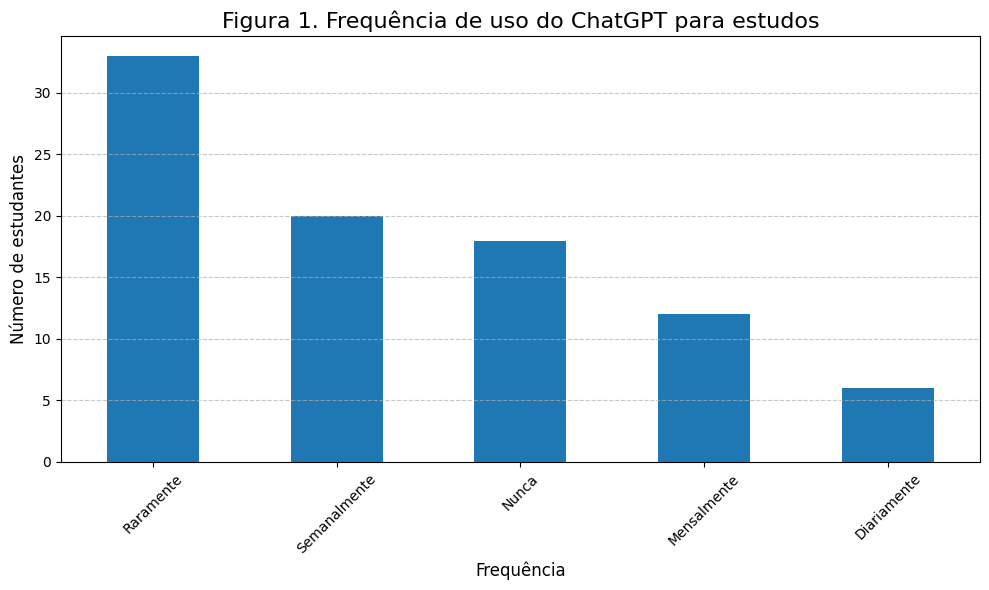

In [28]:
frequency_counts = students_data['chatgpt_study_frequency'].value_counts()

plt.figure(figsize=(10, 6))
frequency_counts.plot(kind='bar')
plt.title('Figura 1. Frequência de uso do ChatGPT para estudos', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Número de estudantes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4.2 Métodos de utilização do ChatGPT para estudos

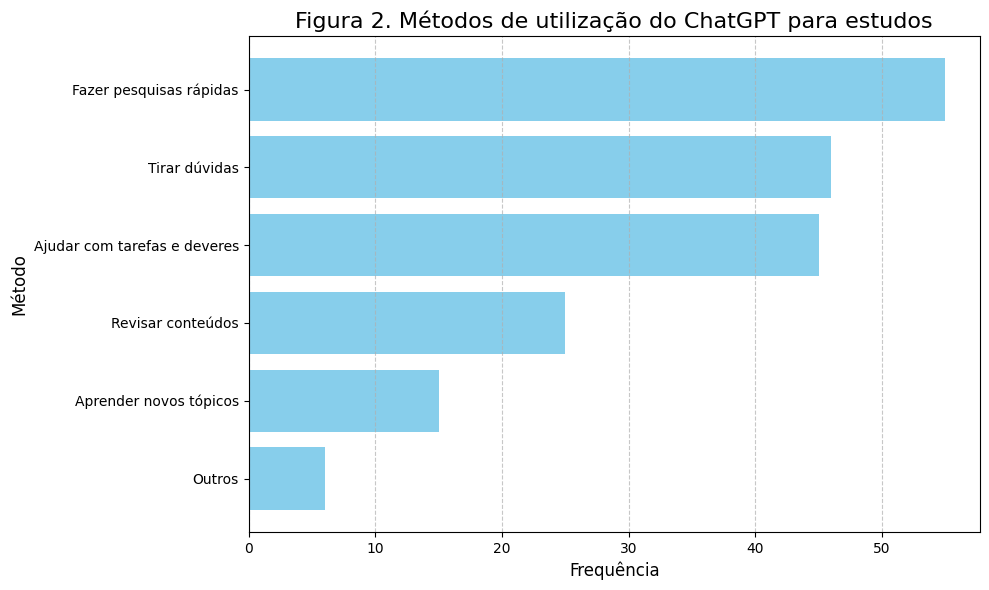

In [33]:
# Normalizar e limpar os dados
def normalize_methods(method):
    method = method.lower().strip()  # Converter para minúsculas e remover espaços extras
    if "não uso" in method or "nunca usei" in method or "não utilizo" in method:
        return None  # Ignorar respostas que indicam não uso
    elif "dúvidas" in method:
        return "Tirar dúvidas"
    elif "revisar" in method:
        return "Revisar conteúdos"
    elif "tarefas" in method or "deveres" in method:
        return "Ajudar com tarefas e deveres"
    elif "pesquisas" in method:
        return "Fazer pesquisas rápidas"
    elif "novos tópicos" in method:
        return "Aprender novos tópicos"
    else:
        return "Outros"

# Aplicar normalização nos métodos
cleaned_methods = students_data['chatgpt_learning_methods'].dropna().str.split(', ').sum()
normalized_methods = [normalize_methods(method) for method in cleaned_methods if normalize_methods(method)]

# Contar os métodos normalizados
method_counts_cleaned = Counter(normalized_methods)

# Converter para DataFrame
methods_cleaned_df = pd.DataFrame(method_counts_cleaned.items(), columns=['Método', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico limpo
plt.figure(figsize=(10, 6))
plt.barh(methods_cleaned_df['Método'], methods_cleaned_df['Frequência'], color='skyblue')
plt.title('Figura 2. Métodos de utilização do ChatGPT para estudos', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Método', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 4.3 Matérias mais beneficiadas pelo uso do ChatGPT

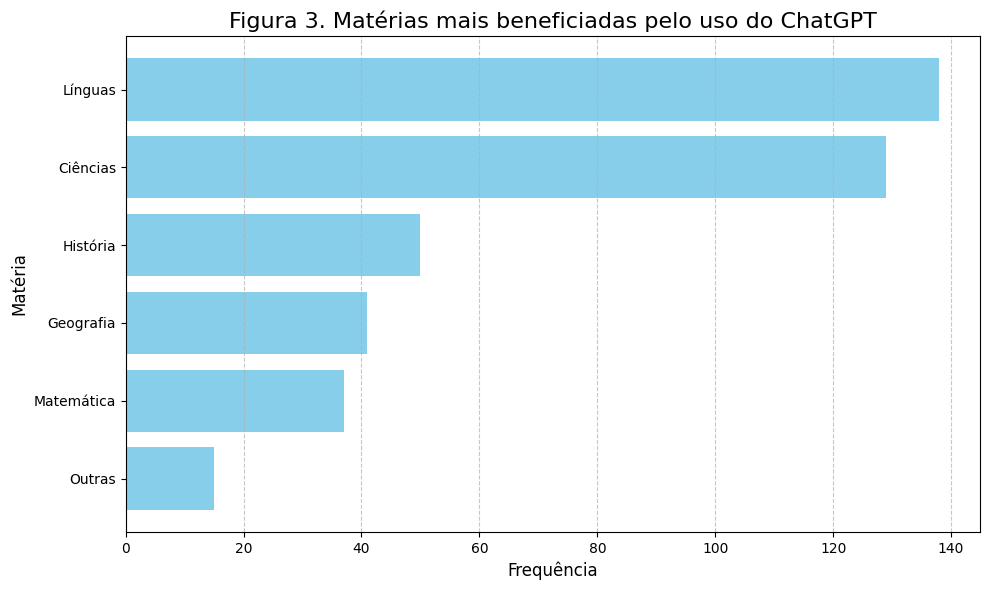

In [35]:
# Normalizar e limpar os dados de matérias
def normalize_subjects(subject):
    subject = subject.lower().strip()  # Converter para minúsculas e remover espaços extras
    if "matemática" in subject:
        return "Matemática"
    elif "línguas" in subject or "português" in subject or "inglês" in subject or "espanhol" in subject:
        return "Línguas"
    elif "ciências" in subject or "biologia" in subject or "química" in subject or "física" in subject:
        return "Ciências"
    elif "geografia" in subject:
        return "Geografia"
    elif "história" in subject:
        return "História"
    else:
        return "Outras"

# Aplicar a normalização nos dados
cleaned_subjects = students_data['chatgpt_useful_subjects'].dropna().str.split(', ').sum()
normalized_subjects = [normalize_subjects(subject) for subject in cleaned_subjects]

# Contar as matérias normalizadas
subject_counts = Counter(normalized_subjects)

# Converter para DataFrame para visualização
subjects_df = pd.DataFrame(subject_counts.items(), columns=['Matéria', 'Frequência']).sort_values(by='Frequência', ascending=False)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(subjects_df['Matéria'], subjects_df['Frequência'], color='skyblue')
plt.title('Figura 3. Matérias mais beneficiadas pelo uso do ChatGPT', fontsize=16)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Matéria', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 4.4 Relação entre frequência de uso e impacto percebido no desempenho escolar

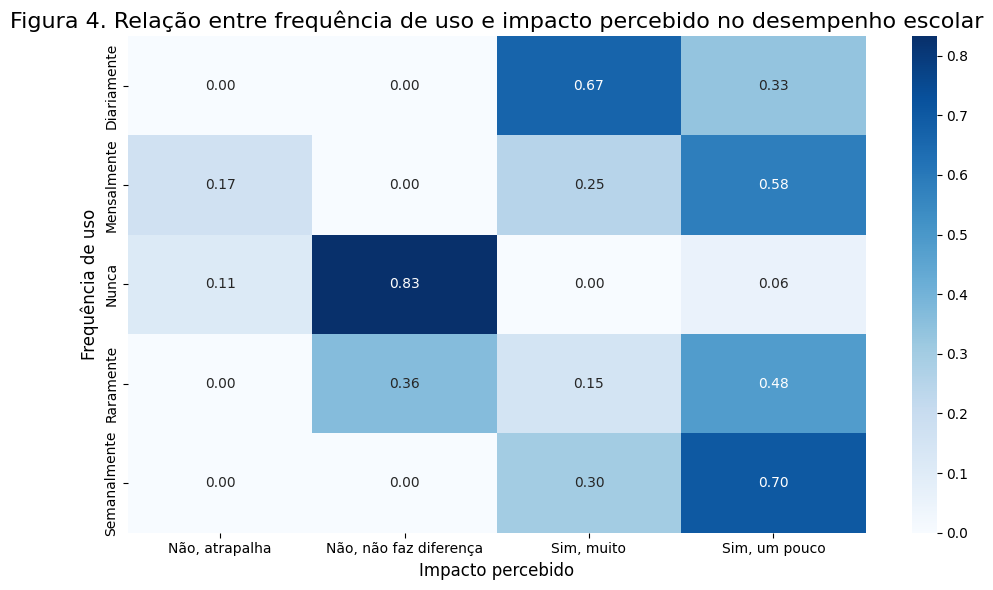

In [40]:
# Criar uma tabela cruzada entre frequência de uso e impacto percebido
impact_frequency_crosstab = pd.crosstab(
    students_data['chatgpt_study_frequency'],
    students_data['chatgpt_help_performance']
)

# Normalizar os dados para calcular proporções
impact_frequency_normalized = impact_frequency_crosstab.div(impact_frequency_crosstab.sum(axis=1), axis=0)

# Plotar um gráfico de calor (heatmap) para visualizar a relação
plt.figure(figsize=(10, 6))
sns.heatmap(
    impact_frequency_normalized,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True
)
plt.title('Figura 4. Relação entre frequência de uso e impacto percebido no desempenho escolar', fontsize=16)
plt.xlabel('Impacto percebido', fontsize=12)
plt.ylabel('Frequência de uso', fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## Referências

Silva, J. A. S., & Mairink, C. H. P. (2019). Inteligência artificial. LIBERTAS: Revista de Ciênciais Sociais Aplicadas, 9(2), 64-85.
Garcia, A. C. (2020). Ética e inteligencia artificial. Computação Brasil, (43), 14-22.
Silva, J. L., Espíndola, M. A. & Pereira, F. C. M. (2023). O uso do ChatGPT® no processo de ensino e aprendizagem: vilão ou aliado. Anais do XI SINGEP-CIK – UNINOVE. UNINOVE -São Paulo.